In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))

def radiacion(rno, nubes, delta):
    rad = rno * (1-nubes-nubes*delta)
    return rad
def dif_temperatura(rn, t, ro, cs, ks):
    delta_t = 2*rn*(t / (ro*cs*ks*3.14159))**(1/2)
    return delta_t

In [3]:
humedad = [0, 20, 40]
capac_calorif = [889, 1158, 1547]
conductividad = [0.25, 1.2, 1.58]
densidad = [1600, 1800, 2000]
radiacion_neta = -22
tiempo = np.arange(13) * 3600

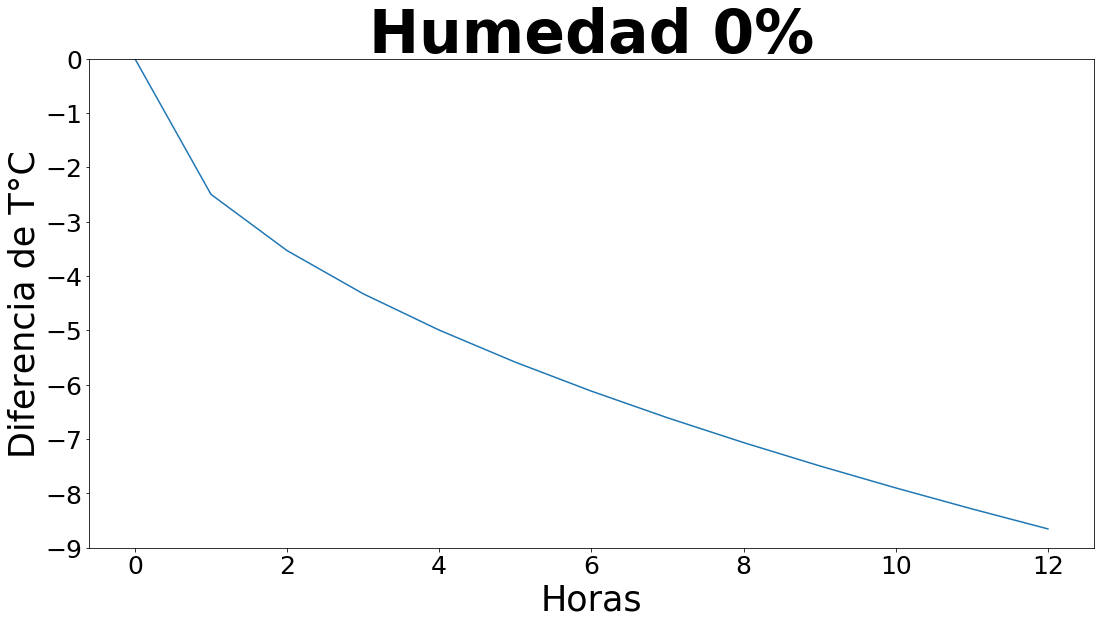

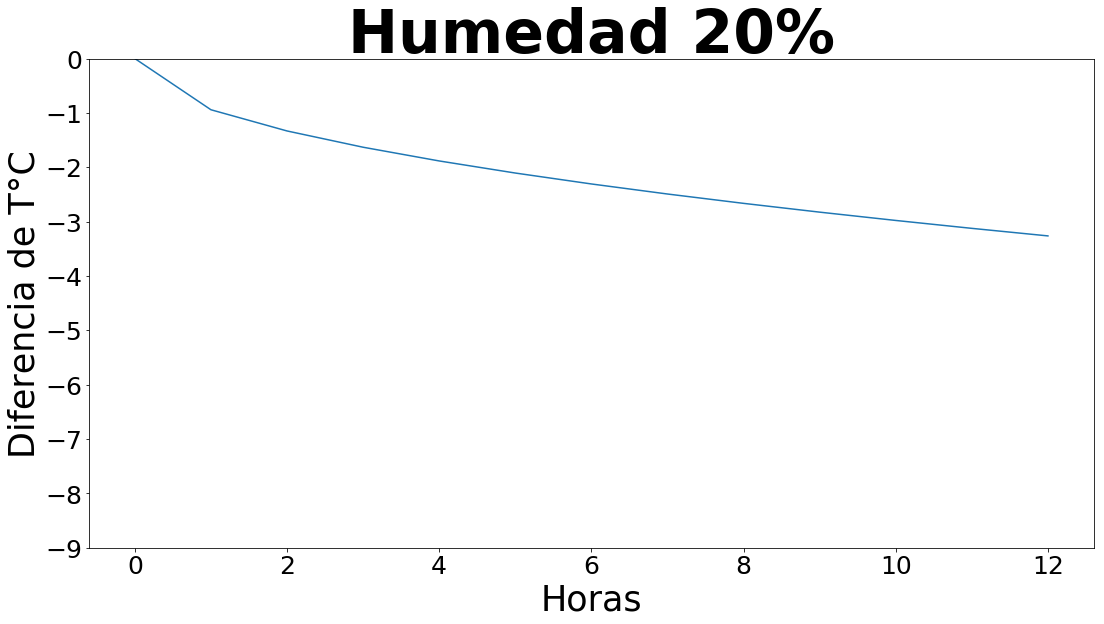

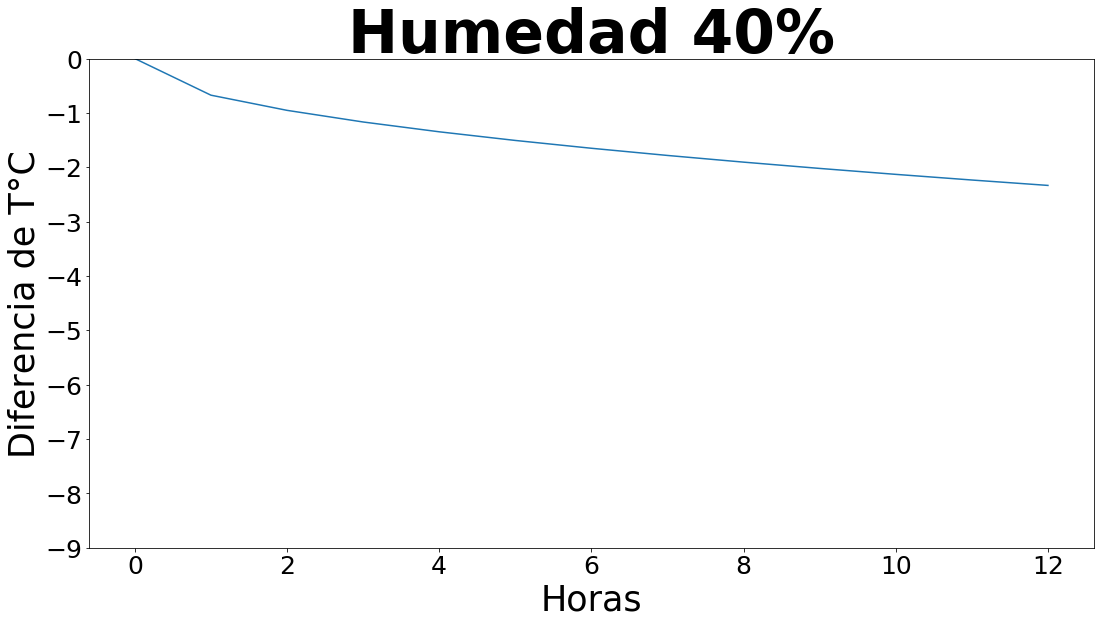

In [7]:
delta_t = list(range(13))
horas = list(range(13))
contador = [0, 1, 2]
for j in contador:
    for i in horas:
        delta_t[i] = dif_temperatura(radiacion_neta, tiempo[i], densidad[j],
                                     capac_calorif[j], conductividad[j]
                                    )
    plt.figure(figsize = (18, 9))
    metadata('Humedad ' + str(humedad[j]) + '%', 'Horas', 'Diferencia de T°C')
    plt.ylim(-9, 0)
    plt.plot(horas, delta_t)
    plt.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_4\\Humedad ' + str(humedad[j]) + '.png')

In [28]:
nubosidad = [2/8, 1]
delta = [0.8, 0.25]
ts = 18

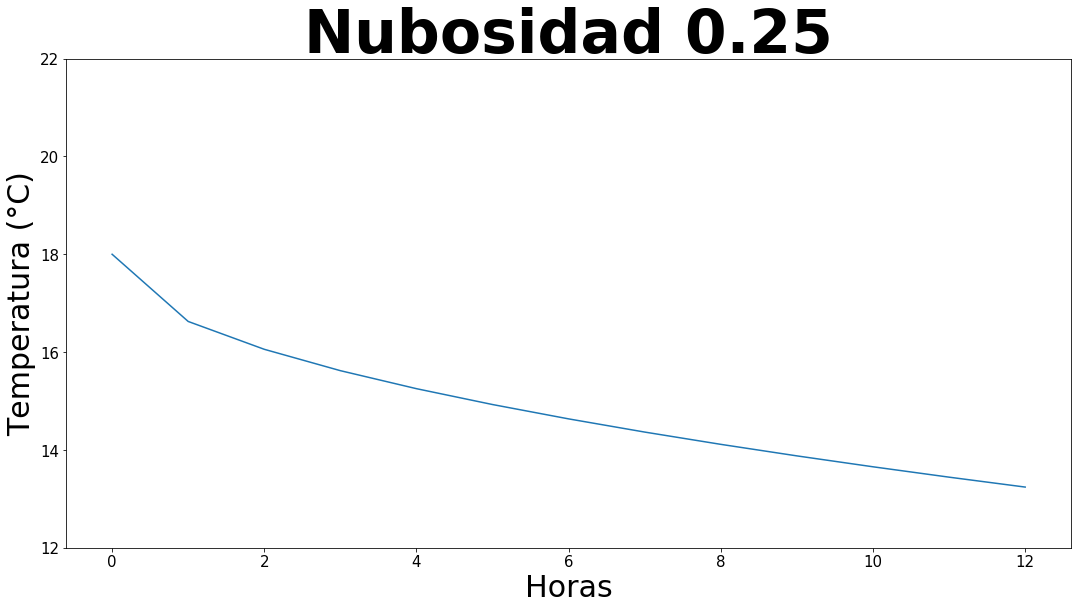

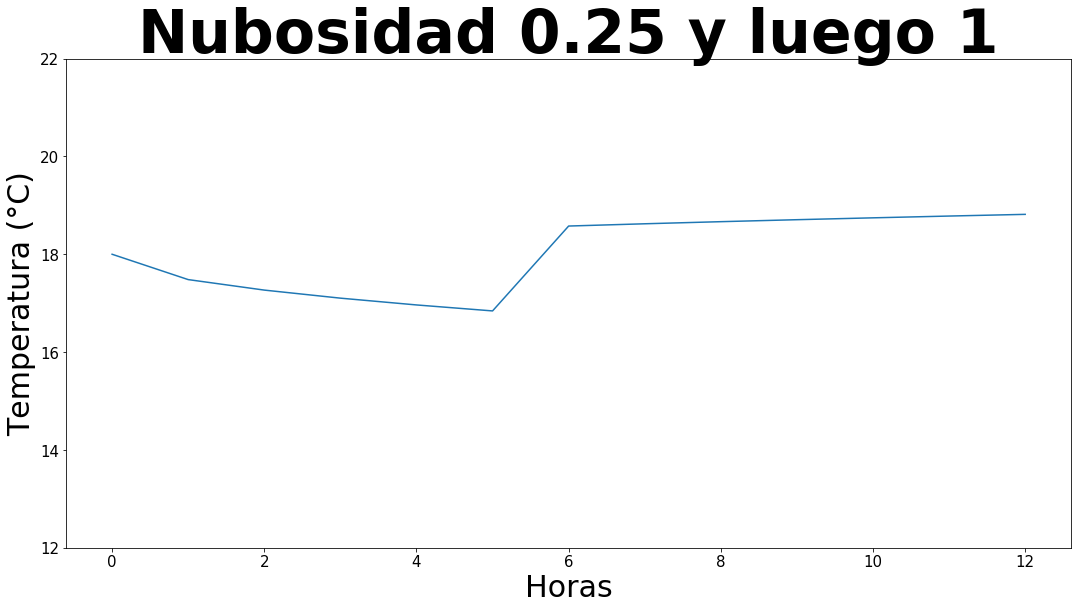

In [36]:
delta_t = list(range(13))
horas = list(range(13))
contador = [0, 1]
for j in contador:
    for i in horas:
        if j == 1 and i>5:
            radiacion_corr = radiacion(radiacion_neta, nubosidad[1], delta[1])
            titulo = 'Nubosidad ' + str(nubosidad[0]) + ' y luego 1'
        else:
            radiacion_corr = radiacion(radiacion_neta, nubosidad[0], delta[0])
            titulo = 'Nubosidad ' + str(nubosidad[0])
        delta_t[i] = dif_temperatura(radiacion_corr, tiempo[i], densidad[j],
                                     capac_calorif[j], conductividad[j]
                                    ) + ts
    plt.figure(figsize = (18, 9))
    metadata(titulo, 'Horas', 'Temperatura (°C)')
    plt.ylim(12, 22)
    plt.plot(horas, delta_t)
    plt.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_4\\' + titulo + '.png')